In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy 
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from bioinfokit.analys import stat

In [187]:
df = pd.read_csv('../docs 2nd Approach/remove_outlier_chauvenet.csv')
df

,index,voltage,value
0,454,0.5v,-2.000000
1,455,0.5v,-2.000000
2,456,0.5v,-2.000000
3,457,0.5v,-2.000000
4,458,0.5v,-2.000000
...,...,...,...
8152,8995,24.5v,1.959184
8153,8996,24.5v,1.959184
8154,8997,24.5v,1.959184
8155,8998,24.5v,1.959184


In [23]:
new = ols('value ~ voltage', data = df).fit()
an = sm.stats.anova_lm(new, typ=2)
an.to_csv('../docs 2nd Approach/ANOVA_chauvenet.csv', index=False)
an.to_excel('../docs 2nd Approach/ANOVA_chauvenet.xlsx', index=False)

In [12]:
res = stat()
res.tukey_hsd(df=df, res_var='value', xfac_var='voltage', anova_model='value ~ C(voltage)')
df_tukey = res.tukey_summary
df_tukey

h:\Bagas\Code\Python\__env\ML-env\lib\site-packages\bioinfokit\analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


,group1,group2,Diff,Lower,Upper,q-value,p-value
0,0.5v,3v,0.765051,0.588280,0.941823,18.989603,0.001000
1,0.5v,6v,0.759472,0.586909,0.932036,19.310809,0.001000
2,0.5v,9v,0.849090,0.676801,1.021379,21.623911,0.001000
3,0.5v,12v,1.082606,0.910385,1.254827,27.581730,0.001000
4,0.5v,15v,1.268637,1.096438,1.440835,32.325491,0.001000
5,0.5v,18v,1.276003,1.103805,1.448202,32.513197,0.001000
6,0.5v,21v,1.577551,1.405352,1.749749,40.196780,0.001000
7,0.5v,24.5v,1.191218,1.018930,1.363507,30.336943,0.001000
8,3v,6v,0.005579,-0.125548,0.136706,0.186689,0.900000
9,3v,9v,0.084039,-0.046727,0.214804,2.819840,0.540772


In [24]:
val = []
for i in df_tukey["p-value"]:
    if i > 0.05:
        val.append("False")
    else:
        val.append("True")
val = pd.DataFrame(val, columns=["H0"])
df_tukey = pd.concat([df_tukey, val], axis=1)
df_tukey

,group1,group2,Diff,Lower,Upper,q-value,p-value,reject,H0
0,3v,6v,0.005579,-0.125548,0.136706,0.186689,0.900000,False,False
1,3v,9v,0.084039,-0.046727,0.214804,2.819840,0.540772,False,False
2,6v,9v,0.089618,-0.035400,0.214636,3.145278,0.392204,False,False
3,12v,24.5v,0.108613,-0.015933,0.233158,3.826399,0.145598,False,False
4,15v,18v,0.007367,-0.117023,0.131756,0.259852,0.900000,False,False
5,15v,24.5v,0.077418,-0.047096,0.201932,2.728117,0.580116,False,False
6,18v,24.5v,0.084785,-0.039729,0.209299,2.987708,0.466861,False,False


In [26]:
df_tukey = df_tukey[df_tukey['reject'] == "False"].reset_index(drop=True)
df_tukey.to_csv('../docs 2nd Approach/tukey_hsd_rejected.csv', index=False)
df_tukey.to_excel('../docs 2nd Approach/tukey_hsd_rejected.xlsx', index=False)

In [188]:
df_u = df.pivot(columns='voltage', values='value')
df_05v = df_u['0.5v'].dropna().reset_index(drop=True)
df_3v = df_u['3v'].dropna().reset_index(drop=True)
df_6v = df_u['6v'].dropna().reset_index(drop=True)
df_9v = df_u['9v'].dropna().reset_index(drop=True)
df_12v = df_u['12v'].dropna().reset_index(drop=True)
df_15v = df_u['15v'].dropna().reset_index(drop=True)
df_18v = df_u['18v'].dropna().reset_index(drop=True)
df_21v = df_u['21v'].dropna().reset_index(drop=True)
df_24_5v = df_u['24.5v'].dropna().reset_index(drop=True)

val = {
    "0.5v" : df_05v,
    "3v" : df_3v,
    "6v" : df_6v,
    "9v" : df_9v,
    "12v" : df_12v,
    "15v" : df_15v,
    "18v" : df_18v,
    "21v" : df_21v,
    "24.5v" : df_24_5v
}


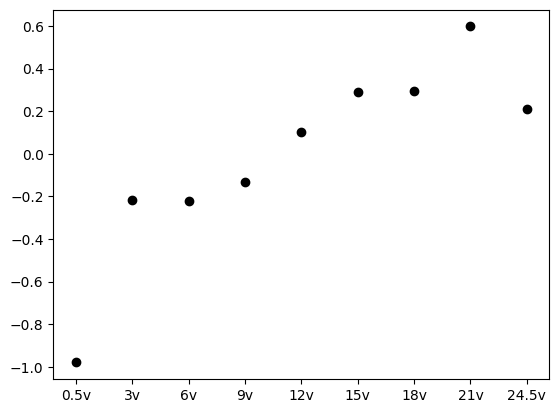

In [231]:

plt.scatter(['', '0.5v', '3v', '6v', '9v', '12v', '15v', '18v', '21v', '24.5v'], mean, marker='o', color='k')

h:\Bagas\Code\Python\__env\ML-env\lib\site-packages\ipykernel_launcher.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator


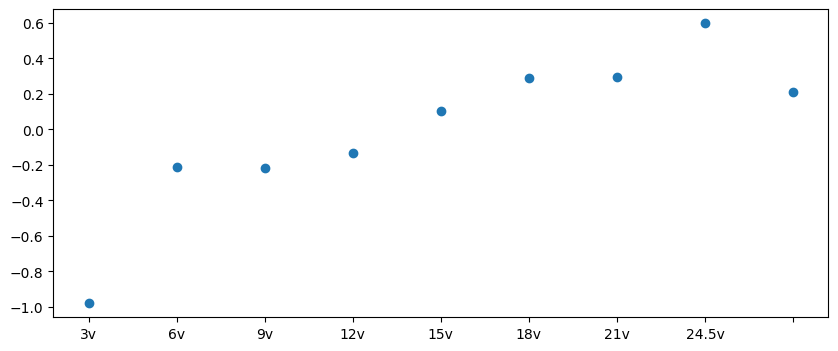

In [242]:
fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(4)

mean = [None]
for i in val.keys():
    mean.append((val[i].mean()))

ax.scatter(['', '0.5v', '3v', '6v', '9v', '12v', '15v', '18v', '21v', '24.5v'], mean, marker='o')
c='k'
# ax.boxplot(
#     val.values(),  
#     patch_artist=True, 
#     boxprops=dict(facecolor="w", color="k"),
#     medianprops=dict(color=c))


ax.set_xticklabels(val.keys())



plt.show()

In [123]:
df['value'][df['voltage'] == '0.5v'].mean()

-0.9801699716713888